In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [29]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 40, 3)
        self.conv4 = nn.Conv2d(40, 100, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(100 * 3 * 3, 320)
        self.fc2 = nn.Linear(320, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 14
        x = F.relu(self.conv2(x)) # 12
        x = self.pool(F.relu(self.conv3(x))) # 5
        x = F.relu(self.conv4(x)) # 3
        x = x.view(-1, 100 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = LeNet()
print (net)
print (net.forward)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 40, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(40, 100, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=900, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
<bound method LeNet.forward of LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 40, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(40, 100, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=900, out_features=320, bias=True)
  (fc2): Linear(in_features=320, out_features=84, bias

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=0.001)

In [22]:
Loss_train = []
Loss_test = []
Iter = 20
for epoch in range(Iter):  # loop over the dataset multiple times

    running_loss = 0.0
    train_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        train_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/1000))
            running_loss = 0.0
        if i == 4999:
            Loss_train.append(train_loss/5000)
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        loss_t = criterion(outputs, labels)
        test_loss += loss_t.item()
        if i % 1000 == 999:
            Loss_test.append(test_loss/1000)
            test_loss = 0.0
print('Finished Training')

[1,  1000] loss: 2.143
[1,  2000] loss: 1.974
[1,  3000] loss: 1.919
[1,  4000] loss: 1.892
[1,  5000] loss: 1.873
[2,  1000] loss: 1.850
[2,  2000] loss: 1.829
[2,  3000] loss: 1.806
[2,  4000] loss: 1.789
[2,  5000] loss: 1.761
[3,  1000] loss: 1.739
[3,  2000] loss: 1.757
[3,  3000] loss: 1.721
[3,  4000] loss: 1.723
[3,  5000] loss: 1.701
[4,  1000] loss: 1.690
[4,  2000] loss: 1.704
[4,  3000] loss: 1.669
[4,  4000] loss: 1.673
[4,  5000] loss: 1.671
[5,  1000] loss: 1.676
[5,  2000] loss: 1.650
[5,  3000] loss: 1.651
[5,  4000] loss: 1.641
[5,  5000] loss: 1.648
[6,  1000] loss: 1.641
[6,  2000] loss: 1.640
[6,  3000] loss: 1.623
[6,  4000] loss: 1.629
[6,  5000] loss: 1.631
[7,  1000] loss: 1.625
[7,  2000] loss: 1.612
[7,  3000] loss: 1.631
[7,  4000] loss: 1.608
[7,  5000] loss: 1.609
[8,  1000] loss: 1.602
[8,  2000] loss: 1.615
[8,  3000] loss: 1.598
[8,  4000] loss: 1.602
[8,  5000] loss: 1.600
[9,  1000] loss: 1.597
[9,  2000] loss: 1.601
[9,  3000] loss: 1.588
[9,  4000] 

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 44 %


In [24]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 60 %
Accuracy of  bird : 28 %
Accuracy of   cat : 20 %
Accuracy of  deer : 33 %
Accuracy of   dog : 36 %
Accuracy of  frog : 58 %
Accuracy of horse : 54 %
Accuracy of  ship : 56 %
Accuracy of truck : 49 %


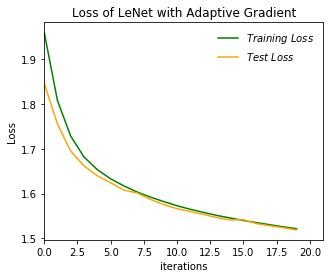

In [27]:
import numpy as np
import matplotlib.pyplot as plt

X_line = np.arange(Iter)

plt.figure(figsize = (5,4))
plt.plot(X_line, Loss_train, color = 'green', label = r'$Training \ Loss$')
plt.plot(X_line, Loss_test, color = 'orange', label = r'$Test \ Loss$')
plt.xlim([0, Iter+1])
plt.legend(loc='upper right',frameon=False) 
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss of LeNet with Adaptive Gradient')
plt.show()